In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("D://datasets//bill_authentication.csv")

In [46]:
data.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# data analysis

In [9]:
data.shape

(1372, 5)

array([[<AxesSubplot:title={'center':'Variance'}>,
        <AxesSubplot:title={'center':'Skewness'}>],
       [<AxesSubplot:title={'center':'Curtosis'}>,
        <AxesSubplot:title={'center':'Entropy'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

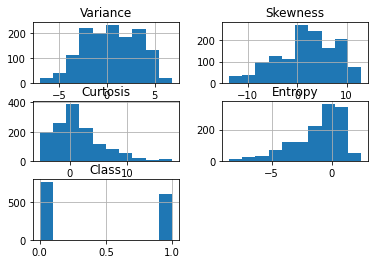

In [11]:
data.hist()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

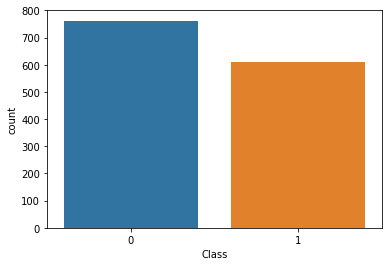

In [16]:
sns.countplot(x='Class',data=data)

from this we interpret  bank note is more authentic or fake depending 

In [17]:
data.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

hence data has no missing values we can interpret that data is clean

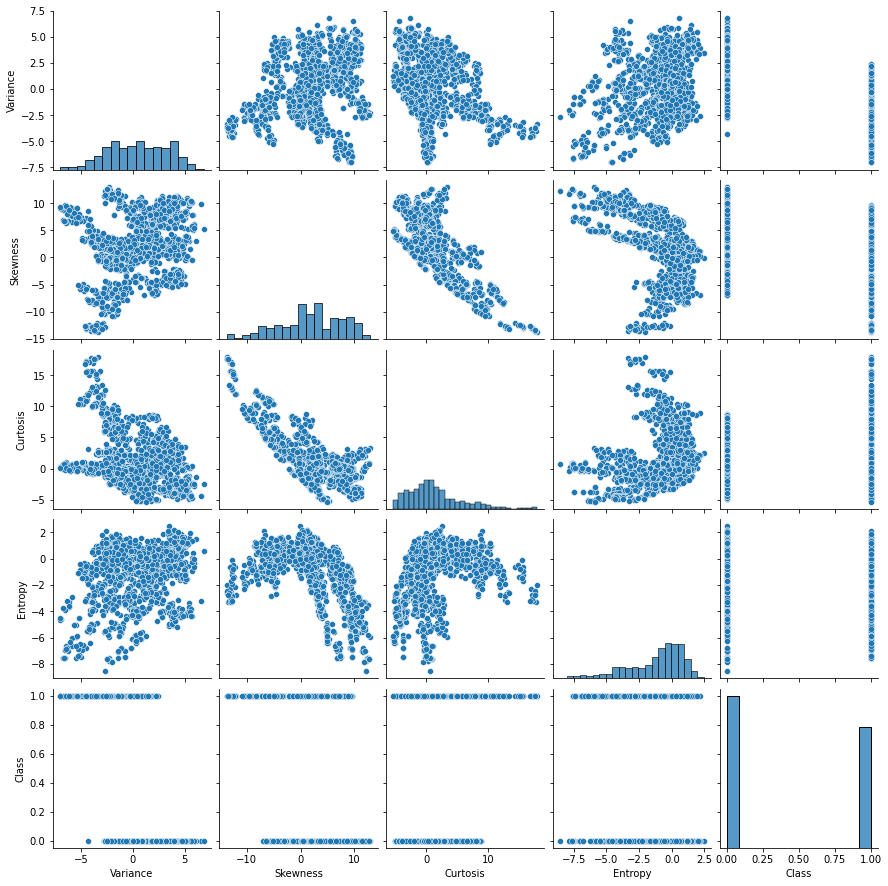

In [18]:
sns.pairplot(data)

# preparing data

In [7]:
x=data.drop(['Class'],axis=1)
y=data['Class']

importing neccessary libraries for making predictions

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

test-train split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

decision tree model

In [38]:
classifier = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=40)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [39]:
y_pred = classifier.predict(X_test)

classification metrics

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9320388349514563


In [47]:
print(confusion_matrix(y_test, y_pred))


[[206   9]
 [ 19 178]]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       215
           1       0.95      0.90      0.93       197

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412



From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 4. This is 98.5 % accuracy. 

# tree visualization

[Text(195.3, 332.955, 'X[0] <= 0.321\ngini = 0.494\nsamples = 1097\nvalue = [611, 486]'),
 Text(97.65, 237.825, 'X[1] <= 7.565\ngini = 0.289\nsamples = 514\nvalue = [90, 424]'),
 Text(48.825, 142.695, 'X[0] <= -0.389\ngini = 0.124\nsamples = 436\nvalue = [29, 407]'),
 Text(24.4125, 47.565, 'gini = 0.057\nsamples = 372\nvalue = [11, 361]'),
 Text(73.23750000000001, 47.565, 'gini = 0.404\nsamples = 64\nvalue = [18, 46]'),
 Text(146.47500000000002, 142.695, 'X[0] <= -4.836\ngini = 0.341\nsamples = 78\nvalue = [61, 17]'),
 Text(122.0625, 47.565, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(170.88750000000002, 47.565, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]'),
 Text(292.95000000000005, 237.825, 'X[2] <= -4.386\ngini = 0.19\nsamples = 583\nvalue = [521, 62]'),
 Text(244.125, 142.695, 'X[0] <= 3.304\ngini = 0.36\nsamples = 34\nvalue = [8, 26]'),
 Text(219.7125, 47.565, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(268.5375, 47.565, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 

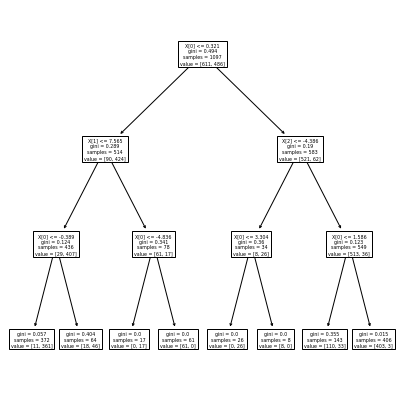

In [32]:
plt.figure(figsize=(7,7))
tree.plot_tree(classifier.fit(X_train,y_train))

# predictions

In [43]:
input1=[[9.23432,6.32433,-8.4452,-3.53653]]
output=classifier.predict(input1)
print(output)

[0]


In [44]:
input2=[[-5.4352,3.54647,3.34563,-8.3241]]
output=classifier.predict(input2)
print(output)

[1]


In [45]:
input3=[[1,1,-1,-1]]
output=classifier.predict(input3)
print(output)

[0]
